In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [93]:
data = pd.read_csv(r"D:\Downloads\poly_reg.csv")

In [94]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [95]:
x = data['Level']
y = data['Salary']

Text(0.5, 1.0, 'Distribution')

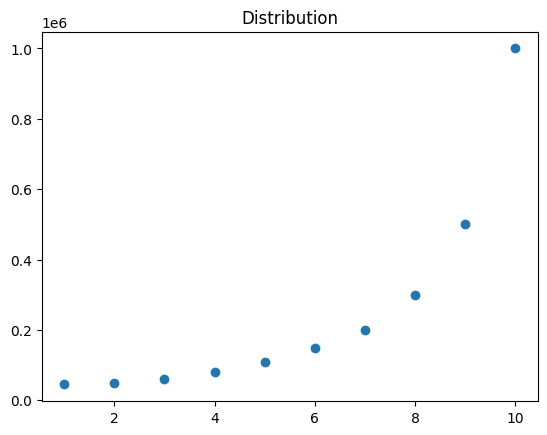

In [96]:
plt.scatter(x , y)
plt.title('Distribution')

Lets try to solve this equation using Simple Linear Regression

In [97]:
sum_y = sum(y)
sum_x = sum(x)
sum_xy = sum(x*y)
sum_x2 = sum(x**2)
n = len(x)

In [98]:
A = np.array([[sum_x , n] , [sum_x2 , sum_x]])
B = np.array([sum_y , sum_xy])
output = np.linalg.solve(A, B)


In [99]:
output

array([  80878.78787879, -195333.33333333])

In [100]:
m_best = output[0]
c_best = output[1]


In [101]:
y_pred = m_best * x + c_best


Text(0.5, 1.0, 'Line of Best Fit')

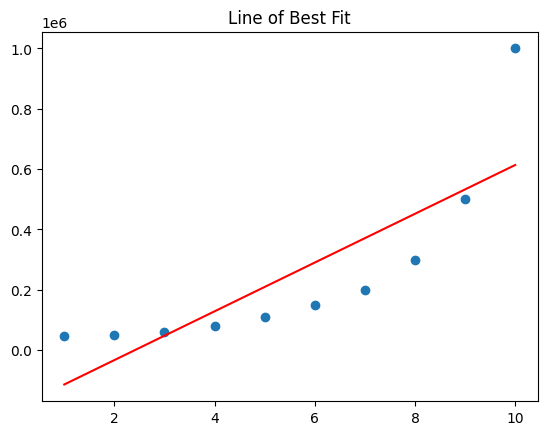

In [102]:
plt.scatter(x , y)
plt.plot(x, y_pred , c = 'r')
plt.title('Line of Best Fit')


As you can see , trying simple linear regression for all points may not be correct . Hence we try to find the line  of best fit using Polynomial Regression

In [164]:
def polynomial_features(x  , n_degree):
    ones = np.ones(len(x))
    ones = ones.reshape(-1 , 1)
    x_features = np.array([x**i for i in range(1 , n_degree+1)])
    x_features = x_features.reshape(-1 , 1)
    poly_features = np.array([np.array(np.append(ones , x_features , axis = 0)[i : i+10 ]) for i in range(0 , len(np.append(ones , x_features , axis = 0)) , len(x)) ]).transpose()
    return poly_features.reshape(len(x) , n_degree+1)

In [165]:
n_degree = 2

Equation is Y^ = X^* B + E

In [167]:
x_poly = polynomial_features(x , n_degree)

In [168]:
x_poly.shape

(10, 3)

In [169]:
def solve(x_poly , y):
    beta1 = np.matmul(x_poly.transpose() , x_poly)
    beta2 = np.matmul(x_poly.transpose() , y)
    beta = np.matmul(beta1 , beta2)
    y_pred = np.matmul(x_poly , beta)
    return y_pred

In [170]:
y_pred = solve(x_poly , y)

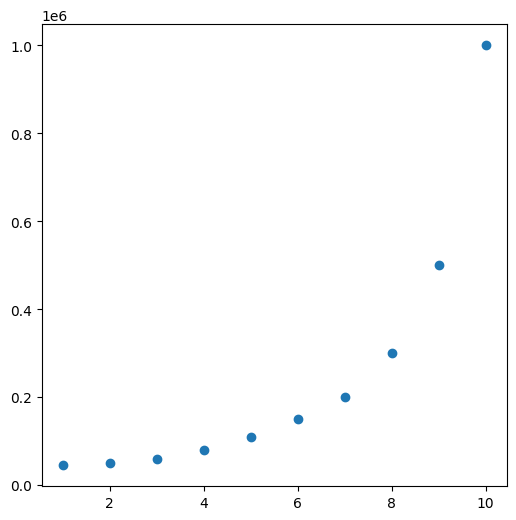

In [171]:
plt.figure(figsize=(6, 6))
plt.scatter(x , y)

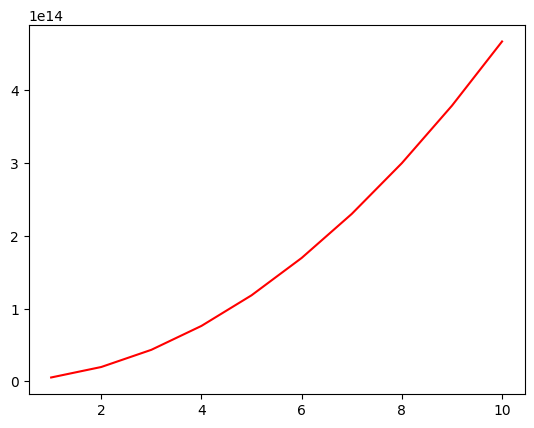

In [172]:
plt.plot(x , y_pred , c = 'r')

This is a better line of best fit than the previous line we got.

Lets try by increasing the degrees

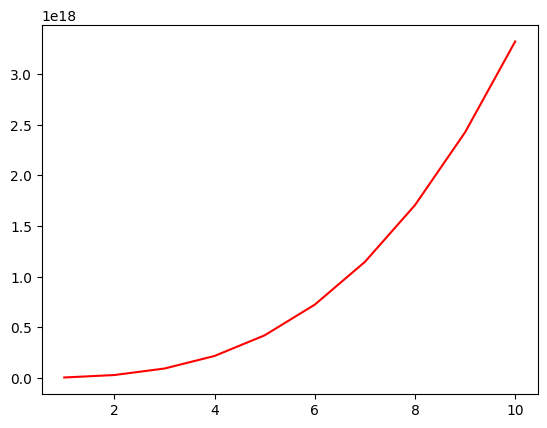

In [175]:
n_degree = 3
x_poly = polynomial_features(x , n_degree)
y_pred = solve(x_poly , y)
plt.plot(x , y_pred , c = 'r')

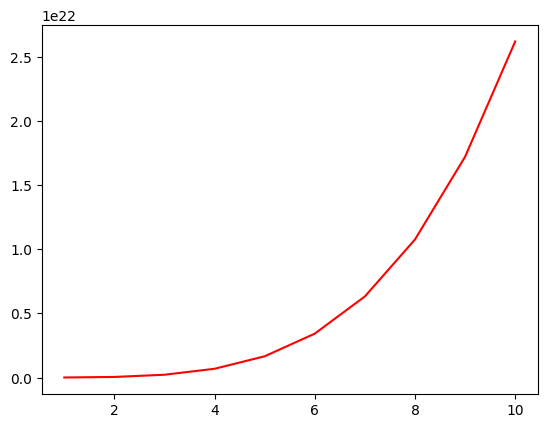

In [176]:
n_degree = 4
x_poly = polynomial_features(x , n_degree)
y_pred = solve(x_poly , y)
plt.plot(x , y_pred , c = 'r')